In [2]:
import numpy as np
import matplotlib.pyplot as plt
import csv
from matplotlib import rc
from scipy import optimize
from scipy.optimize import curve_fit
import pandas
rc('font',**{'size':16})
rc('lines', **{'linewidth':3.0})
rc('savefig', **{'facecolor':'white'})
rc('axes', **{'labelsize':16})
rc('xtick', **{'direction':'in', 'top':True, 'minor.visible':True})
rc('ytick', **{'direction':'in', 'right':True, 'minor.visible':True})

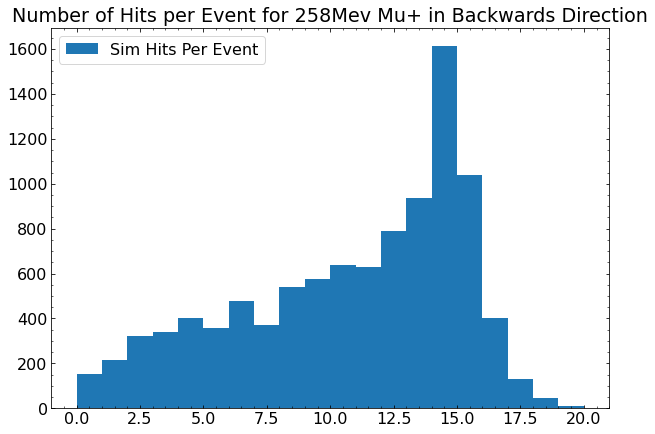

In [3]:
data = np.genfromtxt('/Users/chris/desktop/numhits.txt',delimiter=',',invalid_raise=False)
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(data,bins = np.arange(0,21,1),label="Sim Hits Per Event")
plt.legend()
plt.title("Number of Hits per Event for 258Mev Mu+ in Backwards Direction")
plt.show()

In [41]:
layers = np.genfromtxt('/Users/chris/desktop/layerhits.txt',delimiter=',')

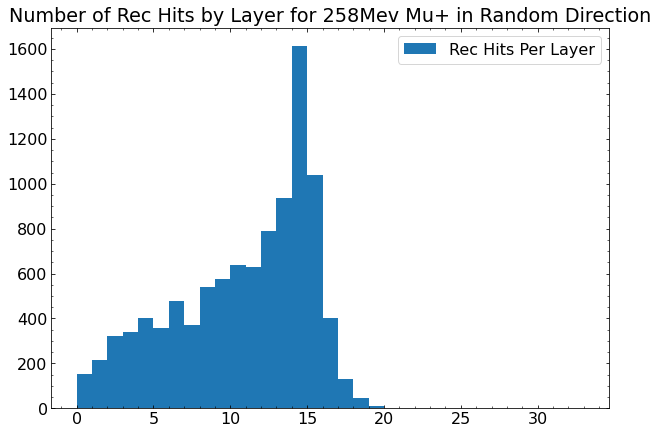

97377


In [43]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(data,bins = np.arange(0,34,1),label="Rec Hits Per Layer")
plt.legend()
plt.title("Number of Rec Hits by Layer for 258Mev Mu+ in Random Direction")
plt.show()
print(len(layers))

10001


10001


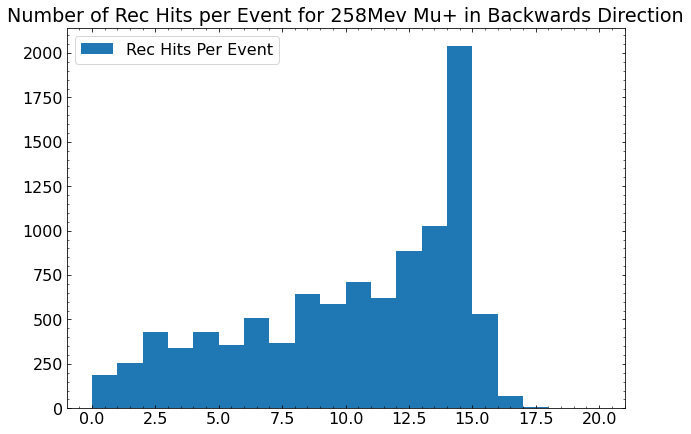

In [5]:
numhits = np.genfromtxt('/Users/chris/desktop/RECnumhits.txt',delimiter=',')
print(len(numhits))
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(numhits,bins = np.arange(0,21,1),label="Rec Hits Per Event")
plt.legend()
plt.title("Number of Rec Hits per Event for 258Mev Mu+ in Backwards Direction")
plt.show()


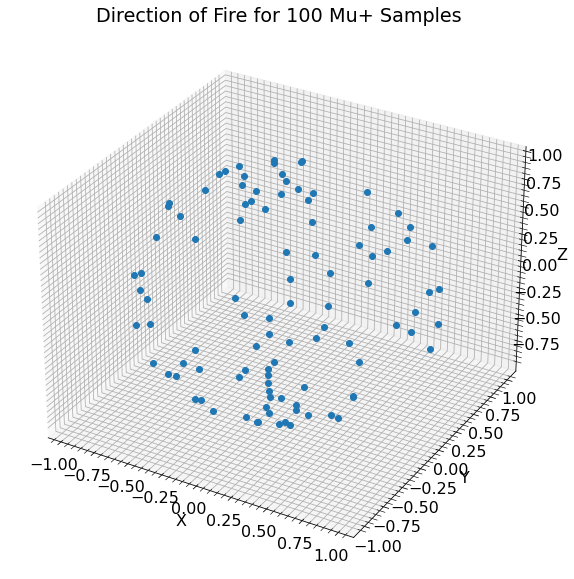

[-0.7193398003386512, -0.4383711467890775, -0.6946583704589974, 0.24192189559966767, -0.5735764363510462, 0.5150380749100542, -0.08715574274765824, -0.06975647374412533, -0.9702957262759965, -0.6427876096865394, 0.5591929034707468, -0.9993908270190958, -0.5150380749100543, -0.8090169943749473, 0.766044443118978, 0.27563735581699916, -0.5735764363510462, -0.1908089953765448, 0.8571673007021123, 0.8910065241883679, -0.7313537016191705, 0.7986355100472928, 0.9702957262759965, 0.4848096202463371, -0.7880107536067219, 0.5000000000000001, -0.20791169081775934, -0.9945218953682733, 0.766044443118978, 0.7431448254773942, -0.1564344650402308, 0.32556815445715676, -0.8386705679454239, 0.6427876096865394, -0.5299192642332048, -0.882947592858927, 0.42261826174069944, 0.06975647374412523, 0.8746197071393957, -0.9612616959383189, 0.9455185755993168, -0.9612616959383189, 0.9335804264972017, -0.848048096156426, -0.9781476007338057, -0.9271838545667873, -0.984807753012208, 0.9612616959383189, 0.2419218

In [50]:
# Plotting Directions of Random Muon Gun shots

# import the random directions
directions = np.genfromtxt('/Users/chris/desktop/positions_vectors.txt')

file = open('/Users/chris/desktop/positions_vectors.txt','r')
lines = file.readlines()

x = [0] * len(lines)
y = [0] * len(lines)
z = [0] * len(lines)

for i in range(len(lines)):
    thisline = lines[i]
    a = thisline.replace('[','')
    b = a.replace(']','')
    c = b.replace('\\','')
    d = c.replace('n','')
    linelist = d.split(',')
    x[i] = float(linelist[0])
    y[i] = float(linelist[1])
    z[i] = float(linelist[2])

ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

# setting up a parametric curve

ax.plot(x, y, z,linestyle='',marker='o')


ax.set_xlabel("X",)
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("Direction of Fire for 100 Mu+ Samples")

plt.show()

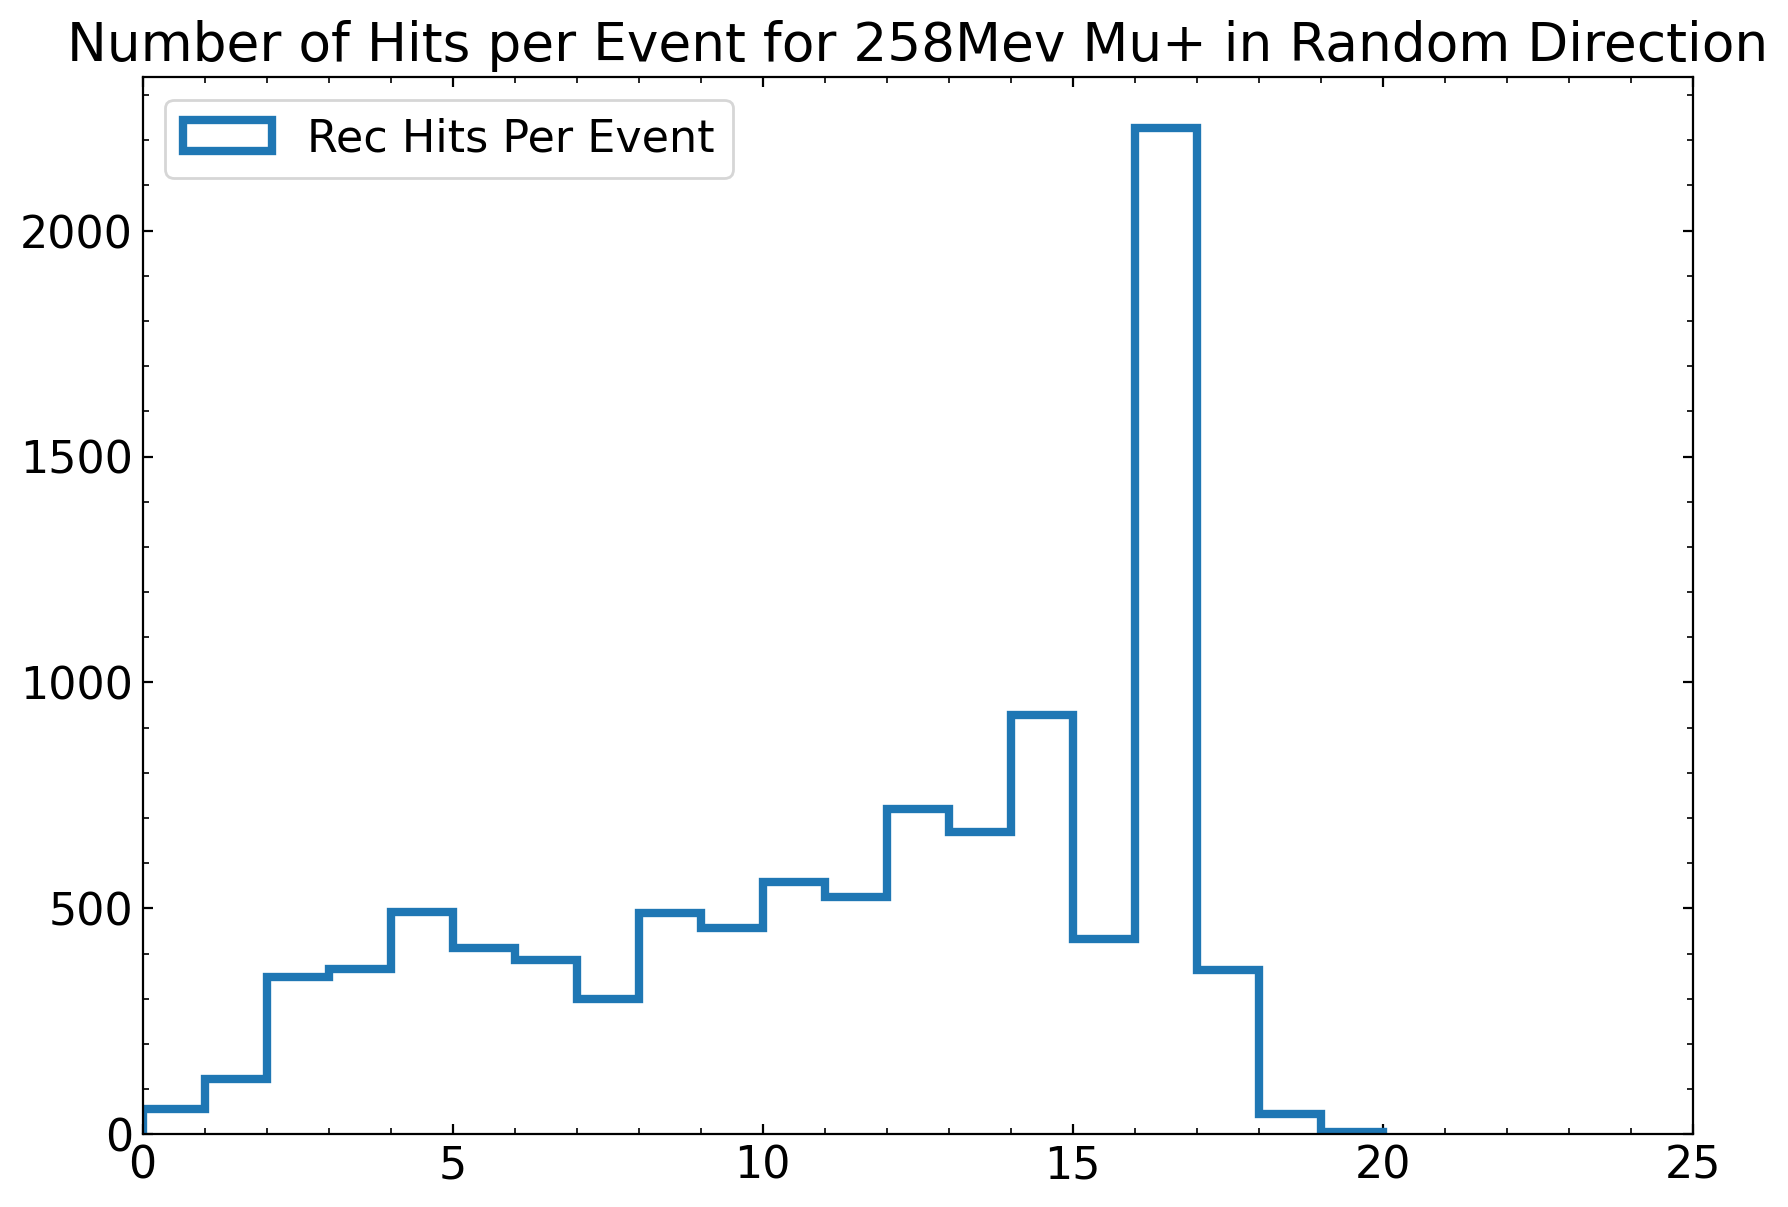

9900
11.035858585858586
4.720001179185996


In [144]:
# New Shit: Better SAmples

newnumhits = np.genfromtxt('/Users/chris/desktop/NewRecHitCount.txt',delimiter=',',invalid_raise=False)
newnumhits = newnumhits[~np.isnan(newnumhits)]
fig, ax = plt.subplots(figsize = (10,7),dpi=200)
ax.hist(newnumhits,bins = np.arange(0,21,1),label="Rec Hits Per Event",histtype=u'step',linewidth='3')
plt.legend(loc='upper left')
plt.xlim(xmin=0,xmax=25)
plt.title("Number of Hits per Event for 258Mev Mu+ in Random Direction")
plt.show()
print(len(newnumhits))
print(np.mean(newnumhits))
print(np.std(newnumhits))

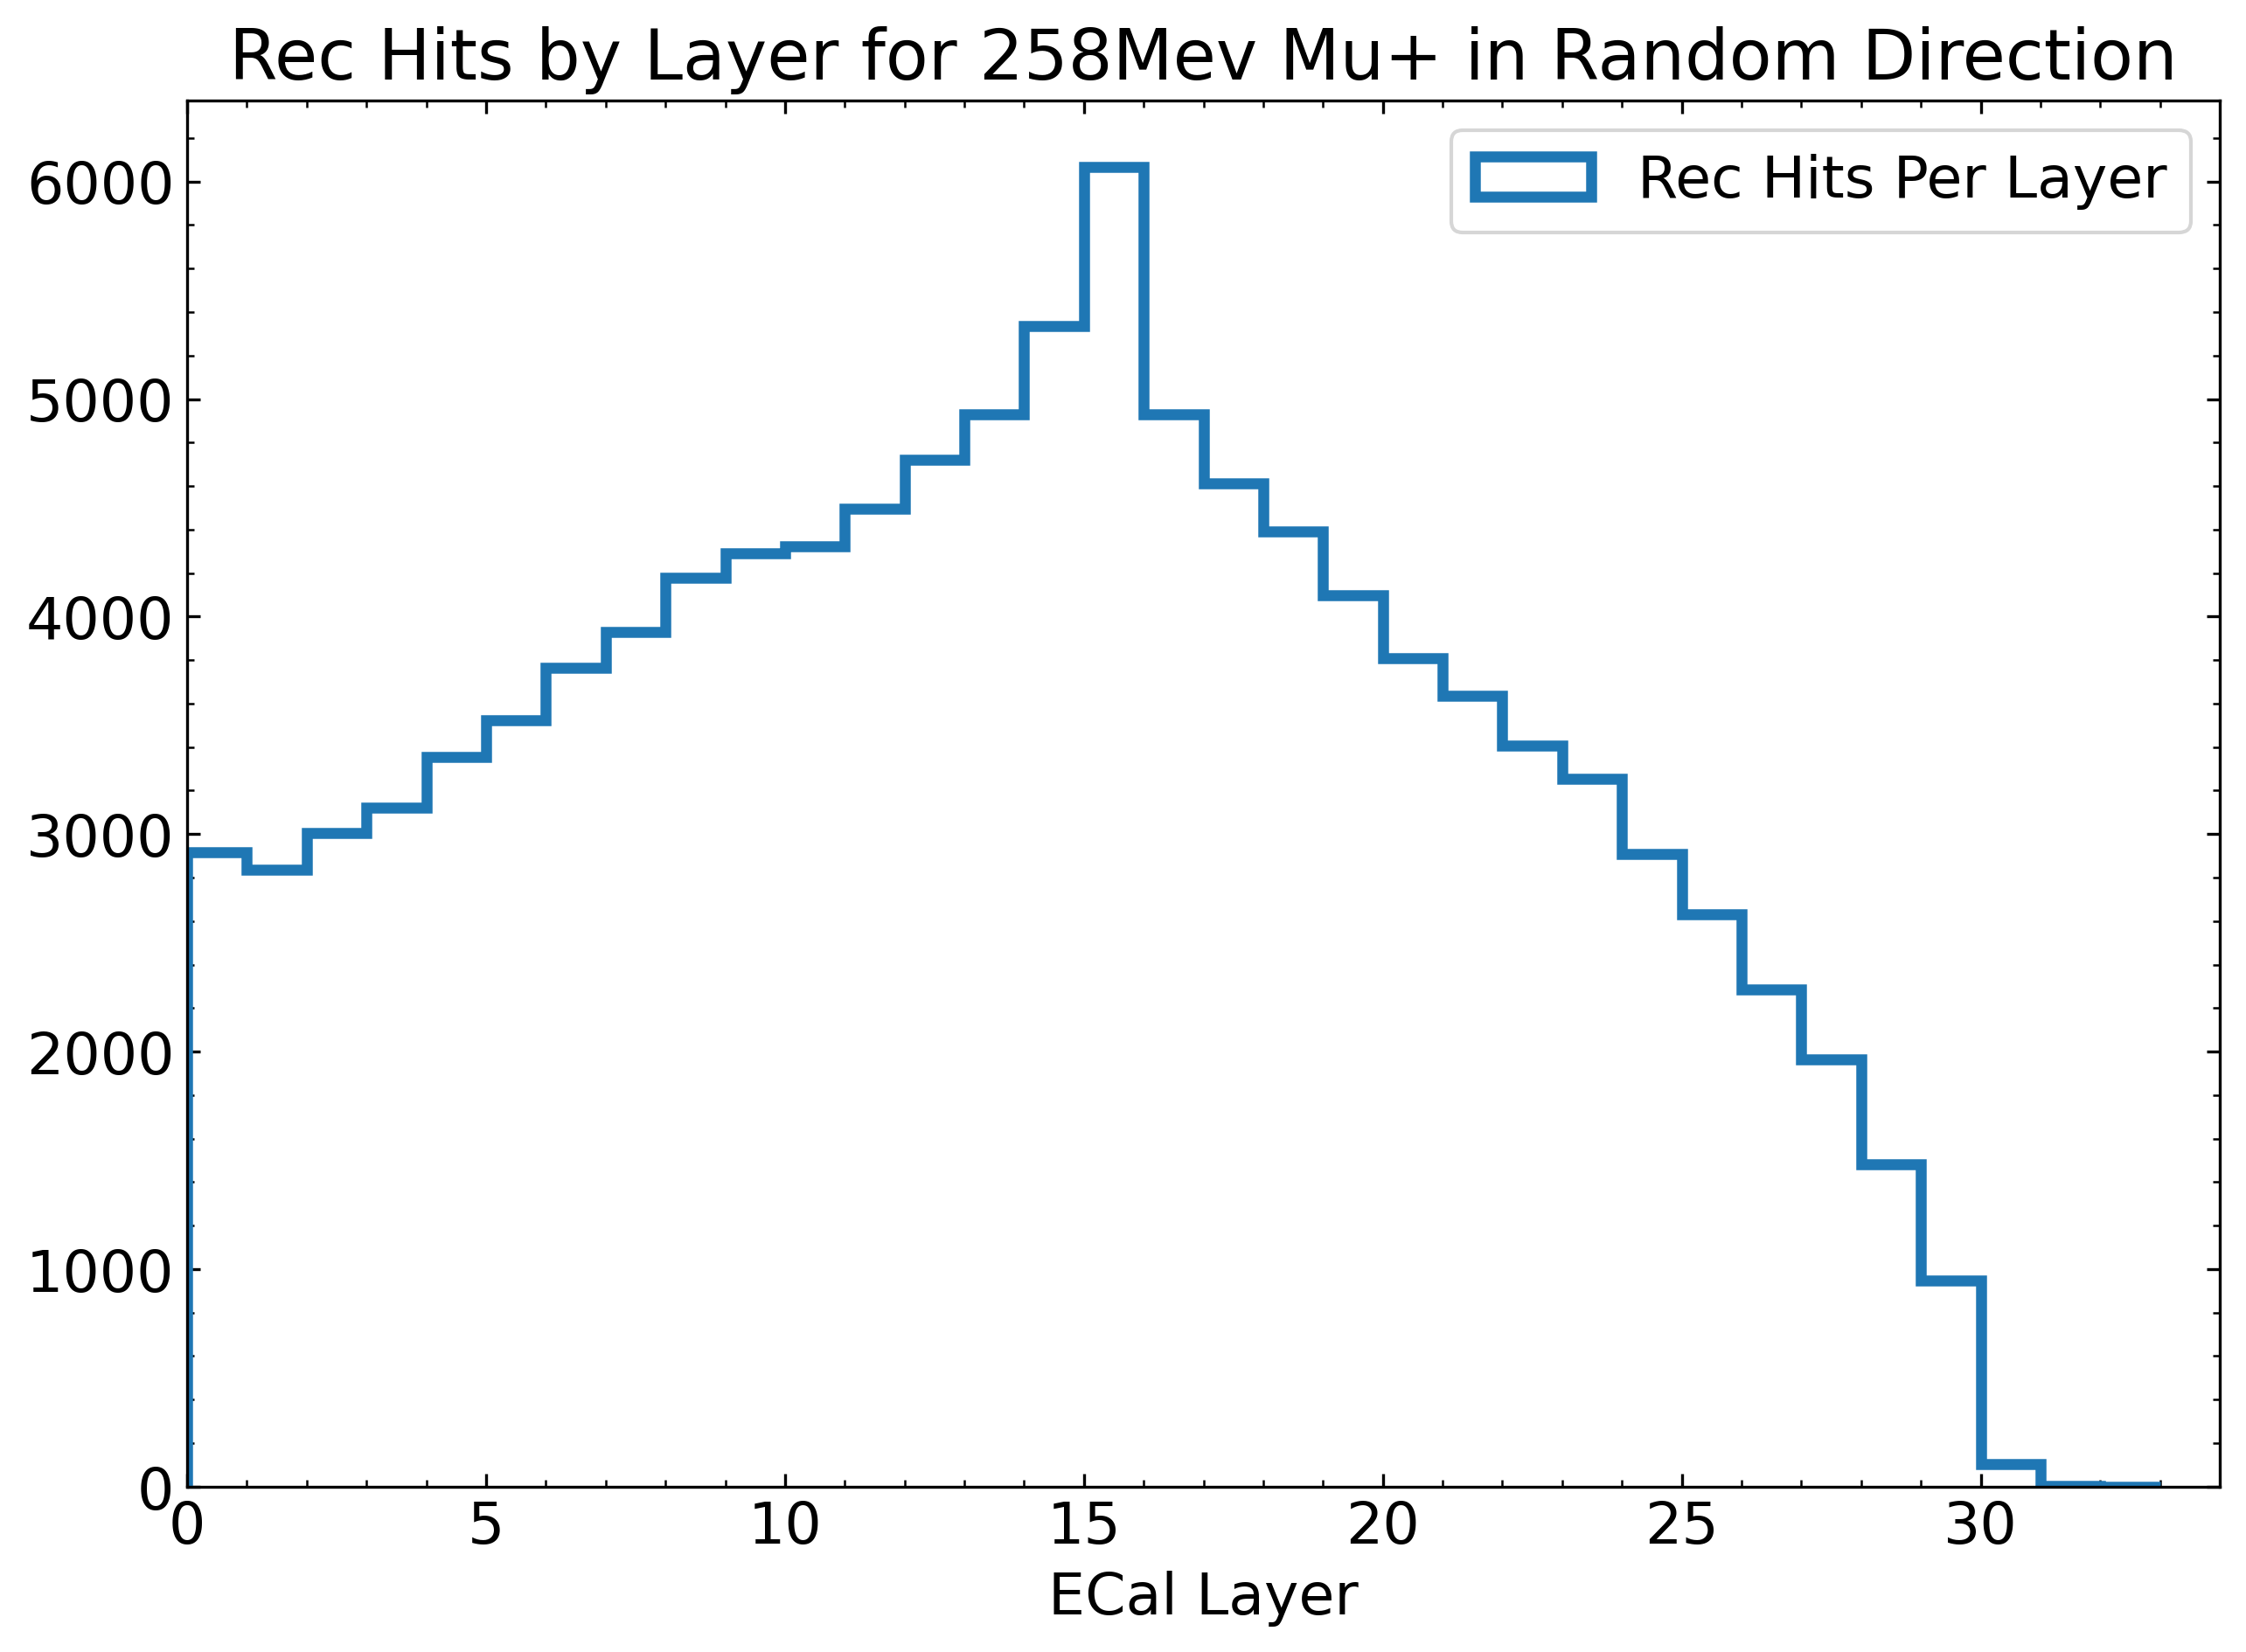

109255
13.612521166079356
7.489876603204653


In [137]:
newlayers = np.genfromtxt('/Users/chris/desktop/NewRecHitLayer.txt',delimiter=',')
newlayers = newlayers[~np.isnan(newlayers)]
fig, ax = plt.subplots(figsize = (10,7),dpi=300)
ax.hist(newlayers,bins = np.arange(0,34,1),label="Rec Hits Per Layer",ls='solid',linewidth='3',histtype=u'step')
plt.legend()
plt.xlabel("ECal Layer")
plt.xlim(xmin=0,xmax=34)
plt.title("Rec Hits by Layer for 258Mev Mu+ in Random Direction")
plt.show()
print(len(newlayers))
print(np.mean(newlayers))
print(np.std(newlayers))

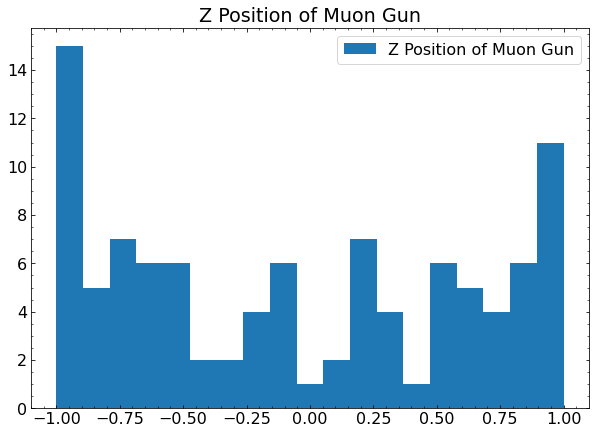

In [77]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(z,bins = np.linspace(-1,1,20),label="Z Position of Muon Gun")
plt.legend()
plt.title("Z Position of Muon Gun")
plt.show()

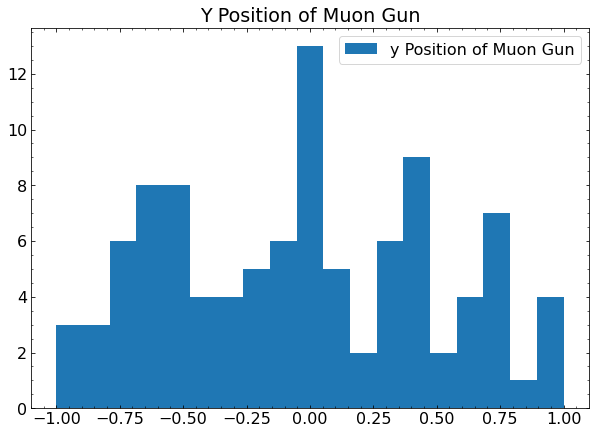

In [55]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(y,bins = np.linspace(-1,1,20),label="y Position of Muon Gun")
plt.legend()
plt.title("Y Position of Muon Gun")
plt.show()

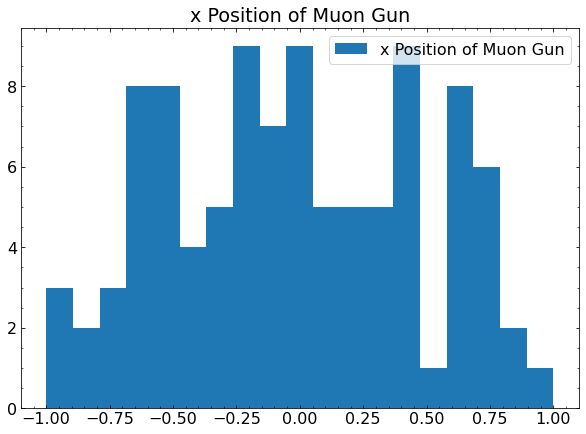

In [56]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(x,bins = np.linspace(-1,1,20),label="x Position of Muon Gun")
plt.legend()
plt.title("x Position of Muon Gun")
plt.show()

In [69]:
size = 10000
xn = [0]*size
yn = [0]*size
zn = [0]*size
import random as rd
for i in range(size):
    t = (np.pi/180)*rd.randint(0,360) #phi angle
    theta = (np.pi/180)*rd.randint(0,180) #theta angle
    xn[i] = np.cos(t)*np.sin(theta) #x angle direction, point on unit sphere
    yn[i] = np.sin(t)*np.sin(theta)
    zn[i] = np.cos(theta)


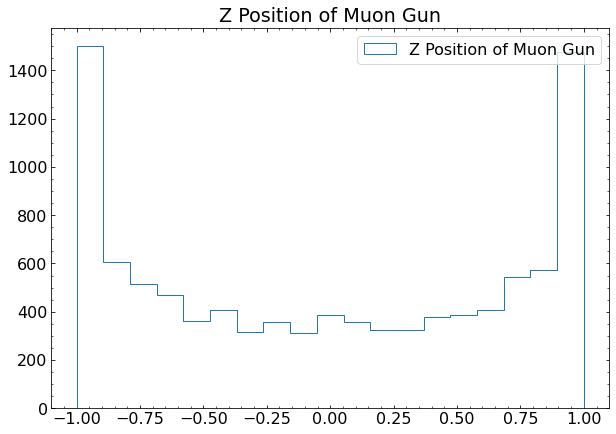

In [106]:
fig, ax = plt.subplots(figsize = (10,7))
ax.hist(zn,bins = np.linspace(-1,1,20),label="Z Position of Muon Gun",histtype=u'step')
plt.legend()
plt.title("Z Position of Muon Gun")
plt.show()

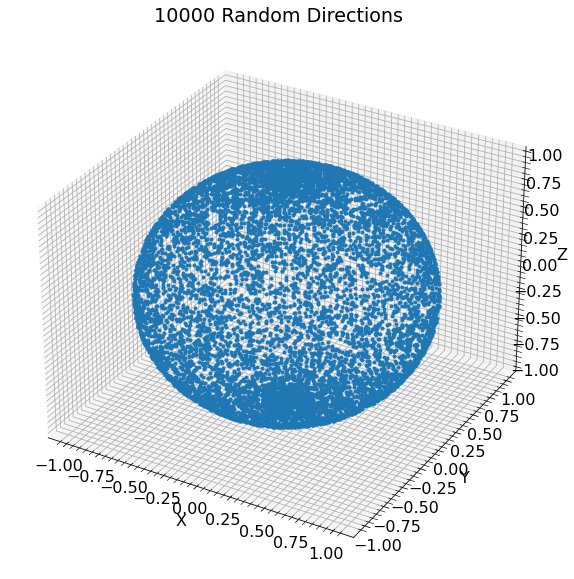

In [70]:
ax = plt.figure(figsize=(10,10)).add_subplot(projection='3d')

# setting up a parametric curve

ax.plot(xn, yn, zn,linestyle='',marker='.')


ax.set_xlabel("X",)
ax.set_ylabel("Y")
ax.set_zlabel("Z")
plt.title("10000 Random Directions")

plt.show()